In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
df=pd.read_excel("D:/EDA/Career Mode player datasets - FIFA 15-21.xlsx")

Part 1 – Basic Data Understanding (Pandas)
Load the dataset and display the first 10 rows.
Show the shape, column names, and data types.
Check for missing values and duplicates.
Get a summary of numerical and categorical columns using .describe().
Find the number of unique clubs and nationalities.
Get the most common nationality among players.
Find the highest value in overall and corresponding player(s).

In [71]:
print(df.head(10))

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   
5     176580  https://sofifa.com/player/176580/luis-suarez/1...   
6         41  https://sofifa.com/player/41/andres-iniesta-lu...   
7     183277  https://sofifa.com/player/183277/eden-hazard/1...   
8       7826  https://sofifa.com/player/7826/robin-van-persi...   
9     121944  https://sofifa.com/player/121944/bastian-schwe...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29 1985-02-05   
2          A. Robben           

In [72]:
print("Shape:",df.shape)
print("Column names:\n",df.columns)
print("Data types\n",df.dtypes)
print(df.describe())

Shape: (16155, 106)
Column names:
 Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)
Data types
 sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 106, dtype: object
           sofifa_id           age                            dob  \
count   16155.000000  16155.000000                          16155   
mean   189284.184525     24.776230  1989-03-29 12:10:33.760445696   
min         2.000000     16.000000            1969-07-19 00:00:00   
25%    178042.500000     21.000000            1986-01-30 00:00:00   
50%    200841.000000     24.000000            1989-09-04 00:00:00   
75%    214346.000000     

In [73]:
print("Null values:",df.isnull().sum())
print("Duplicated Values:",df.duplicated().sum())

Null values: sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64
Duplicated Values: 0


In [74]:
print("Most Frequent Value in Country name:",df['nationality'].mode())

Most Frequent Value in Country name: 0    England
Name: nationality, dtype: object


In [75]:
print(df['club_name'].nunique())
print(df['nationality'].nunique())

577
149


In [76]:
print(max(df['overall']))
print()

93



Part 2 – EDA (Exploratory Data Analysis)
Plot a histogram of player ages.


Find the top 10 players by overall rating.


Average player age per club.


Scatter plot: overall vs potential.


Bar chart of average wage by nationality (top 10).


Boxplot of overall ratings grouped by position.


Find the top 10 players with the highest market value.


Text(0, 0.5, 'Count')

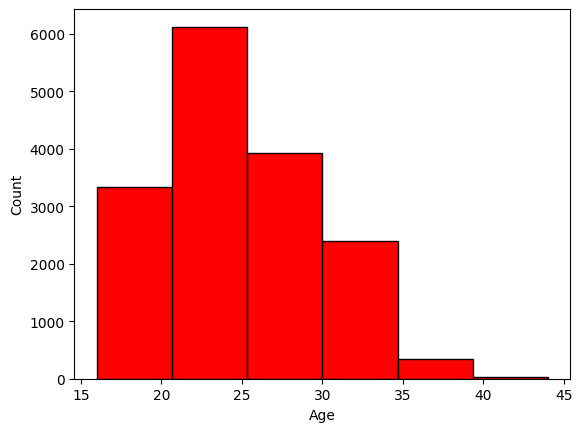

In [77]:
plt.hist(df['age'],bins=6,edgecolor="black",color="red")
plt.xlabel("Age")
plt.ylabel("Count")

In [78]:
for_overall=df.sort_values(by='age',ascending=False)
print(for_overall.head(10)['short_name'])

10891      A. Pierobon
16145    B. Richardson
3730      Kim Byung Ji
15964       P. Mathers
470         B. Friedel
8011      M. Hahnemann
13071         S. Banks
6210          J. Henao
15965         A. Bayes
2664         C. Blanco
Name: short_name, dtype: object


Text(0, 0.5, 'potential')

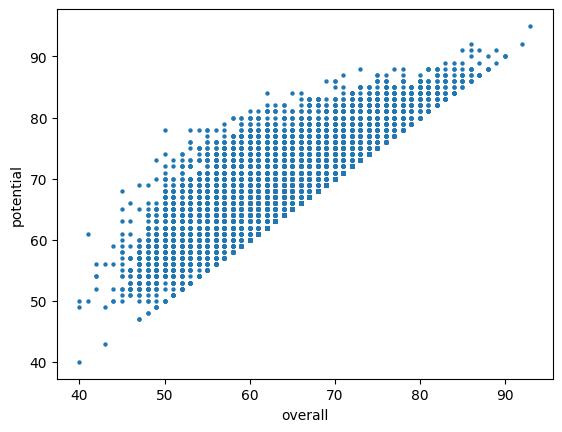

In [79]:
plt.scatter(df['overall'],df['potential'],linewidths=0,s=10)
plt.xlabel('overall')
plt.ylabel('potential')

In [80]:
df.groupby('club_name')['age'].mean()

club_name
1. FC Heidenheim 1846       24.708333
1. FC Kaiserslautern        23.142857
1. FC Köln                  24.214286
1. FC Nürnberg              23.250000
1. FC Union Berlin          24.107143
                              ...    
Åtvidabergs FF              26.538462
Çaykur Rizespor             25.846154
Évian Thonon Gaillard FC    25.709677
Örebro SK                   24.615385
Śląsk Wrocław               25.000000
Name: age, Length: 577, dtype: float64

In [81]:
#grouped=df.groupby('player_positions')['overall']
#plt.boxplot(grouped)

Part 3 – Statistics
Calculate the mean, median, and mode of overall.


Find variance and standard deviation of overall.


Correlation between age and overall rating.


Percentage of players with potential > 85.


In [ ]:
print(np.mean(df['overall']))
print(np.median(df['overall']))
print(df['overall'].mode())
print(np.var(df['overall']))
print(np.std(df['overall']))
print(np.corrcoef(df['overall'],df['age']))

63.83039306716187
64.0
0    64
Name: overall, dtype: int64
51.40422636979408
7.16967407695734
[[1.         0.43697553]
 [0.43697553 1.        ]]


In [ ]:
count=df[df['potential']>85]
total_age=df['potential'].value_counts().sum()
some_value=count['potential'].value_counts().sum()
print((some_value/total_age)*100)

0.6375735066542866


Part 4 – Linear Algebra & NumPy
Create NumPy arrays for overall and potential.


Perform vector subtraction (potential - overall).


Compute the dot product between these arrays.


Normalize the overall array using vector normalization.


In [82]:
overall_np=np.array(df['overall'])
potential_np=np.array(df['potential'])
print(overall_np)
print(potential_np)

[93 92 90 ... 40 40 40]
[95 92 90 ... 50 49 40]


In [83]:
print(potential_np-overall_np)
print(np.dot(potential_np,overall_np))
print(overall_np/np.linalg.norm(overall_np))

[ 2  0  0 ... 10  9  0]
71094023
[0.01139146 0.01126897 0.01102399 ... 0.00489955 0.00489955 0.00489955]


Part 5 – Calculus
Assume:
 Performance_Score = (overall)^2 + 0.5×potential
 Find derivative wrt overall.


In [84]:
overall,potential = sp.symbols('overall potential')
performance_score = overall**2+0.5*potential
derivative= sp.diff(performance_score, overall)
print(derivative)


2*overall


Part 6 – Feature Engineering
Create is_elite = 1 if overall ≥ 85 else 0.


Create value_million = value_eur / 1,000,000.


Create wage_thousand = wage_eur / 1,000.


Create a binary column high_growth = 1 if growth > 5 else 0.


Extract the primary position from player_positions.


In [87]:
df['is_elite']=df['overall']>=85
df['is_elite'].astype(int)
print(df['is_elite'])
df['value_million']=df['value_eur']/1000000
print(df['value_million'])
df['wage_thousand']=df['wage_eur']/1000
print(df['wage_thousand'])

0         True
1         True
2         True
3         True
4         True
         ...  
16150    False
16151    False
16152    False
16153    False
16154    False
Name: is_elite, Length: 16155, dtype: bool
0        100.500
1         79.000
2         54.500
3         52.500
4         63.500
          ...   
16150      0.020
16151      0.030
16152      0.015
16153      0.015
16154      0.000
Name: value_million, Length: 16155, dtype: float64
0        550.0
1        375.0
2        275.0
3        275.0
4        300.0
         ...  
16150      2.0
16151      2.0
16152      2.0
16153      2.0
16154      2.0
Name: wage_thousand, Length: 16155, dtype: float64


In [88]:
df['primary_position']=df['player_positions'].str.split(',').str[0]
print(df['primary_position'])

0        CF
1        LW
2        RM
3        ST
4        GK
         ..
16150    CB
16151    ST
16152    LM
16153    CB
16154    CM
Name: primary_position, Length: 16155, dtype: object


Part 7 – SQL Simulation in Pandas
Select all players with overall > 85.


Sort players by value_eur descending.


Group by nationality and count players.


Get top 5 clubs with highest average overall.

In [89]:
print(count['short_name'])
print(df.sort_values(by='value_eur',ascending=False))
group=df.groupby('nationality').size()
print(group)


0                L. Messi
1       Cristiano Ronaldo
2               A. Robben
3          Z. Ibrahimović
4                M. Neuer
              ...        
1526         Y. Tielemans
2353           S. Scuffet
2815            J. Brandt
2816         A. Halilović
3360          R. Živković
Name: short_name, Length: 103, dtype: object
       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
4         167495  https://sofifa.com/player/167495/manuel-neuer/...   
2           9014  https://sofifa.com/player/9014/arjen-robben/15...   
3          41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
...          ...                                                ...   
9053      137011  https://sofifa.com/player/137011/pavel-pergl/1...   
10595     212022  https://sofifa.com/player/212022/adrian-bone/1...   
10512     209241  https://sofi

In [90]:
top_5=df.groupby('club_name')['overall'].mean()
top_5.sort_values(ascending=False,inplace=True)
print(top_5.head(5))

club_name
FC Barcelona           80.120000
FC Bayern München      78.586207
Paris Saint-Germain    77.666667
Milan                  76.666667
Real Madrid            75.212121
Name: overall, dtype: float64


Part 8 – Insights
Which player has the highest market value?


Which club has the highest average overall rating?


Which nationality has the most players?


Is there a strong correlation between potential and overall?


What percentage of players are “elite” (overall ≥ 85)?


In [91]:
print(df.sort_values(by='value_eur', ascending=False).head(1)[['short_name','value_eur']])

  short_name  value_eur
0   L. Messi  100500000


In [92]:
print(top_5.head(1))

club_name
FC Barcelona    80.12
Name: overall, dtype: float64


In [93]:
group.sort_values(ascending=False,inplace=True)
print(group.head(1))


nationality
England    1627
dtype: int64


In [94]:
print(np.corrcoef(df['potential'],df['overall']))

[[1.         0.80395195]
 [0.80395195 1.        ]]


In [95]:
elite_per=df[df['is_elite']==1]['is_elite'].count()
elite_per=(elite_per/df['is_elite'].size)*100
print(elite_per)


0.2785515320334262


In [96]:
df['can_be_release']=((df['release_clause_eur']-df['value_eur'])>0)
df['can_be_release'].sum()


np.int64(0)

In [97]:
print(type(df['release_clause_eur'].iloc[0]))
print(type(df['value_eur'].iloc[0]))


<class 'numpy.float64'>
<class 'numpy.int64'>


In [98]:
df['loss_for_player']=(df['value_eur']-df['wage_eur']*52)<0
print(df['loss_for_player'])
print(df['loss_for_player'].sum())
df['can_move_to_another_club']=df['loss_for_player']
print(df['can_move_to_another_club'])


0        False
1        False
2        False
3        False
4        False
         ...  
16150     True
16151     True
16152     True
16153     True
16154     True
Name: loss_for_player, Length: 16155, dtype: bool
5303
0        False
1        False
2        False
3        False
4        False
         ...  
16150     True
16151     True
16152     True
16153     True
16154     True
Name: can_move_to_another_club, Length: 16155, dtype: bool


Scale: Often from 1 to 5, where:

1 → Unknown or very low reputation internationally

2-3 → Some recognition, maybe known in domestic leagues or regional competitions

4-5 → Widely recognized globally, often national team stars or top players

In [99]:
df['star_players']=df['international_reputation']>=4
print(df['star_players'])

0         True
1         True
2         True
3         True
4         True
         ...  
16150    False
16151    False
16152    False
16153    False
16154    False
Name: star_players, Length: 16155, dtype: bool


In [100]:
df['contract_expiry']=df['contract_valid_until']<=2021
print(df['contract_expiry'])

0        True
1        True
2        True
3        True
4        True
         ... 
16150    True
16151    True
16152    True
16153    True
16154    True
Name: contract_expiry, Length: 16155, dtype: bool


In [101]:
df.shape

(16155, 115)